In [11]:
import pandas as pd

In [12]:
# df = pd.read_csv('players_blegium_japan.csv')
# df = pd.read_csv('fifaplayers.csv')
df = pd.read_csv('timestampplayers.csv')
df

,teamId,frame,x,y,ball_posession,timestamp
0,Blue,0,51,73,0,0.150150
1,Green,0,46,71,0,0.150150
2,Green,0,48,50,0,0.150150
3,Green,0,42,55,0,0.150150
4,Blue,0,49,34,0,0.150150
...,...,...,...,...,...,...
31514,Green,1566,29,51,0,23.840483
31515,Green,1566,35,43,0,23.840483
31516,Green,1566,20,62,0,23.840483
31517,Blue,1566,18,61,0,23.840483


In [36]:
end_x

29

In [16]:
points = []
start_x = None
start_y = None

for index, row in df.iterrows():
    if row['ball_posession'] == 1:  # Check if ball possession is 1
        if start_x is None:  # Starting point
            start_x = row['x']
            start_y = row['y']
            points.append((start_x, start_y, row['teamId']))  # Append starting point
            points.append((end_x, end_y, row['teamId']))      # Append ending point
        else:  # Ending point
            end_x = row['x']
            end_y = row['y']
            start_x = None
            start_y = None


# # If the loop ends with an ongoing possession, consider it as an ending point
# if start_x is not None:
#     end_x = row['x']
#     print("End X:", row[])
#     end_y = row['y']
#     if row['ball_posession'] == 1:
#         points.append((start_x, start_y, row['teamId']))  # Append starting point
#         points.append((end_x, end_y, row['teamId']))      # Append ending point

print("Points:", points)
len(points)

Points: [(23, 77, 'Green'), (29, 46, 'Green'), (23, 77, 'Blue'), (23, 77, 'Blue'), (23, 77, 'Blue'), (23, 76, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (23, 77, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (21, 77, 'Green'), (21, 77, 'Green'), (21, 77, 'Blue'), (21, 77, 'Blue'), (22, 77, 'Blue'), (21, 77, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (22, 77, 'Blue'), (21, 78, 'Green'), (22, 78, 'Green'), (22, 78, 'Green'), (21, 78, 'Green'), (21, 78, 'Green'), (22, 78, 'Green'), (21, 78, 'Green'), (21, 77, 'Green'), (22, 78, 'Green'), (21, 78, 'Green'), (22, 78, 'Green'), (22, 78, 'Green'), (22, 78, 'Blue'), (22, 78, 'Blue'), (22, 78, 'Blue'), (22, 78, 'Blue'), (22, 78, 'Blue'), (22, 78, 'Blue'), (42, 76, 'Blue'), (22, 78, 'Blue'), (41, 77, 'Blue'), (42, 77, 'Blue'), (41, 77, 'Blue'), (42, 78, 'Blue'), (42, 78, 'Green'), (41, 77, 'Green'), (42, 78, 'Green'), (42, 78, 'Green'), (43, 80, 'Green'), (42, 79, 'Green'

752

In [156]:
# Convert the list object 'points' to a pandas DataFrame
df_points = pd.DataFrame(points)

# Count the occurrences of the value 2 in the DataFrame
count = df_points[2].value_counts()

count
# points.values.count(2)

2
Blue     472
Green    280
Name: count, dtype: int64

In [157]:
for i in range(5):
    current_point = points[i]
    next_point = points[i + 1]
    # Extract coordinates and teamID
    current_coords = current_point[:2]
    next_coords = next_point[:2]
    team_id_current = current_point[2]
    team_id_next = next_point[2]
    distance = ((current_coords[0] - next_coords[0])**2 + (current_coords[1] - next_coords[1])**2)**0.5


In [168]:
import pandas as pd
# Initialize lists to store data for DataFrame
starting_points = []
ending_points = []
pass_completions = []
team=[]

# Iterate through the points list
for i in range(len(points) - 1):
    current_point = points[i]
    next_point = points[i + 1]

    # Extract coordinates and teamID
    current_coords = current_point[:2]
    next_coords = next_point[:2]
    team_id_current = current_point[2]
    team_id_next = next_point[2]

    # Determine pass completion
    if team_id_current == team_id_next:
        if current_coords == next_coords:
            pass_completions.append("no pass attempted")
            team.append(team_id_current)
        else:
            pass_completions.append("pass completed")
            team.append(team_id_current)
    else:
        pass_completions.append("pass incomplete")
        team.append(team_id_current)

    # Add starting and ending points to lists
    starting_points.append(current_coords)
    ending_points.append(next_coords)

# Create DataFrame
df_fin = pd.DataFrame({
    "Starting_Point": starting_points,
    "Ending_Point": ending_points,
    "PassCompletion": pass_completions,
    "Team": team
})

print(df_fin)


    Starting_Point Ending_Point     PassCompletion   Team
0         (23, 77)     (29, 46)     pass completed  Green
1         (29, 46)     (23, 77)    pass incomplete  Green
2         (23, 77)     (23, 77)  no pass attempted   Blue
3         (23, 77)     (23, 77)  no pass attempted   Blue
4         (23, 77)     (23, 76)     pass completed   Blue
..             ...          ...                ...    ...
746       (30, 46)     (33, 42)     pass completed   Blue
747       (33, 42)     (30, 45)     pass completed   Blue
748       (30, 45)     (30, 45)  no pass attempted   Blue
749       (30, 45)     (29, 45)     pass completed   Blue
750       (29, 45)     (29, 46)     pass completed   Blue

[751 rows x 4 columns]


In [169]:
import numpy as np
 
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Threshold distance
threshold = 10

# Iterate through each row and apply distance threshold if PassCompletion is not "no pass attempted"
for index, row in df_fin.iterrows():
    if row['Team'] != 'Red':
        if row['PassCompletion'] != "no pass attempted":
            distance = euclidean_distance(row['Starting_Point'], row['Ending_Point'])
            if distance < threshold:
                # Remove row if distance is below threshold
                df_fin.drop(index, inplace=True)

print("DataFrame after removing rows with distance below threshold (except 'no pass attempted'):")
print(df_fin)

DataFrame after removing rows with distance below threshold (except 'no pass attempted'):
    Starting_Point Ending_Point     PassCompletion   Team
0         (23, 77)     (29, 46)     pass completed  Green
1         (29, 46)     (23, 77)    pass incomplete  Green
2         (23, 77)     (23, 77)  no pass attempted   Blue
3         (23, 77)     (23, 77)  no pass attempted   Blue
6         (22, 77)     (22, 77)  no pass attempted   Blue
..             ...          ...                ...    ...
731       (28, 57)     (28, 57)  no pass attempted   Blue
732       (28, 57)     (28, 57)  no pass attempted   Blue
738       (27, 57)     (27, 57)  no pass attempted   Blue
739       (27, 57)     (34, 44)     pass completed   Blue
748       (30, 45)     (30, 45)  no pass attempted   Blue

[398 rows x 4 columns]


In [203]:
# Coordinates of the goal
gc_left = (0, 40)
gc_right = (120, 0)

# Define the starting and ending rectangles
sixyard_left = [(0, 18), (18, 18), (18, 62), (0, 62)]
pen_left = [(0, 30), (5, 30), (5, 50), (0, 50)]
#right
sixyard_right = [(115, 30), (120, 30), (115, 50), (120, 50)]
pen_right=[(102, 18), (120, 18), (120, 62), (102, 62)]

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Calculate progressive pass
def is_progressive_pass(start, end, goal, threshold=0.25):
    start_distance = euclidean_distance(start, goal)
    end_distance = euclidean_distance(end, goal)
    return end_distance < start_distance * (1 - threshold)

def point_in_rectangle(point, rect):
    x, y = point
    x_coords, y_coords = zip(*rect)
    return min(x_coords) <= x <= max(x_coords) and min(y_coords) <= y <= max(y_coords)

def determine_pass_type(row):
    if row['PassCompletion'] != 'no pass attempted': #chekc how many passes attempted were progressive, completed or incomplete, effective
        if row['Team'] == 'Blue':
            goal_coordinates = gc_left
            starting_rect=pen_left
            ending_rect=sixyard_left
        else:
            goal_coordinates = gc_right
            starting_rect=pen_left
            ending_rect=sixyard_right
        if point_in_rectangle(row['Starting_Point'], starting_rect) and point_in_rectangle(row['Ending_Point'], ending_rect):
            return 'cutback'
        if is_progressive_pass(row['Starting_Point'], row['Ending_Point'], goal_coordinates):
            return 'progressive pass'
        if not point_in_rectangle(row['Starting_Point'], ending_rect) and point_in_rectangle(row['Ending_Point'], ending_rect):
            return 'cross'
        if euclidean_distance(row['Starting_Point'], row['Ending_Point']) > 32:  # 35 yards = ~32 meters
            return 'long ball'
    return 'Normal Pass'

df_fin['TypeOfPass'] = df_fin.apply(determine_pass_type, axis=1)

# Display the DataFrame
print(df_fin)

    Starting_Point Ending_Point     PassCompletion   Team   TypeOfPass
0         (23, 77)     (29, 46)     pass completed  Green  Normal Pass
1         (29, 46)     (23, 77)    pass incomplete  Green  Normal Pass
2         (23, 77)     (23, 77)  no pass attempted   Blue  Normal Pass
3         (23, 77)     (23, 77)  no pass attempted   Blue  Normal Pass
6         (22, 77)     (22, 77)  no pass attempted   Blue  Normal Pass
..             ...          ...                ...    ...          ...
731       (28, 57)     (28, 57)  no pass attempted   Blue  Normal Pass
732       (28, 57)     (28, 57)  no pass attempted   Blue  Normal Pass
738       (27, 57)     (27, 57)  no pass attempted   Blue  Normal Pass
739       (27, 57)     (34, 44)     pass completed   Blue  Normal Pass
748       (30, 45)     (30, 45)  no pass attempted   Blue  Normal Pass

[398 rows x 5 columns]


In [ ]:
#check is first ball_possesion= 1 and then suppose if frame was 4, it isnntalty shifts to frame 5 and keeps on moving until it sppots a next ball_possesion=1, and in the mean time it keeps checking if ball was detected in any of the rectangles, if yes, then it is a goal
#make alag shots ka df

In [171]:
print(df_fin['PassCompletion'].value_counts())

PassCompletion
no pass attempted    350
pass completed        38
pass incomplete       10
Name: count, dtype: int64


In [172]:
#find maxium ycoordinate in both starting and ending point in df_fin
max_y = max(df_fin['Starting_Point'].apply(lambda x: x[1]).max(), df_fin['Ending_Point'].apply(lambda x: x[1]).max())
max_y
over= max_y-80

In [207]:
filtered_rows = []
previous_end_point = None

for index, row in df_fin.iterrows():
    if row['PassCompletion'] == "pass completed":
        if previous_end_point is None or row['Starting_Point'] != previous_end_point:
            filtered_rows.append(row)
        previous_end_point = row['Ending_Point']

filtered_df = pd.DataFrame(filtered_rows)
print(filtered_df)  
len(filtered_df)

    Starting_Point Ending_Point  PassCompletion   Team   TypeOfPass
0         (23, 77)     (29, 46)  pass completed  Green  Normal Pass
41        (22, 78)     (42, 76)  pass completed   Blue  Normal Pass
66        (41, 85)     (45, 61)  pass completed   Blue  Normal Pass
95        (40, 86)     (32, 70)  pass completed  Green  Normal Pass
204       (61, 64)     (46, 58)  pass completed  Green  Normal Pass
223       (62, 63)     (48, 75)  pass completed  Green  Normal Pass
239       (48, 74)     (61, 67)  pass completed  Green  Normal Pass
324       (77, 49)     (88, 45)  pass completed   Blue  Normal Pass
326       (71, 31)     (77, 49)  pass completed  Green  Normal Pass
374       (79, 46)     (83, 26)  pass completed   Blue  Normal Pass
408       (77, 44)     (90, 37)  pass completed  Green  Normal Pass
416       (75, 45)     (75, 62)  pass completed  Green  Normal Pass
425       (76, 62)     (73, 43)  pass completed   Blue  Normal Pass
546       (52, 59)     (61, 44)  pass completed 

19

In [ ]:
#do tosql here
df_fin.to_csv('fifapasses.csv', index=False)    

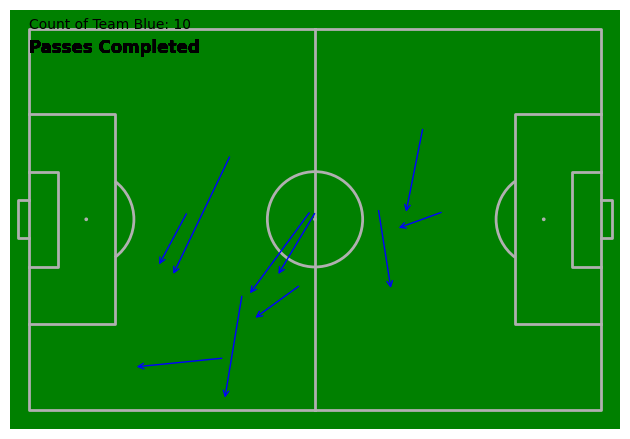

In [208]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Filter out passes where the starting point of the current pass is the same as the ending point of the previous pass
filtered_rows = []
previous_end_point = None

for index, row in df_fin.iterrows():
    if row['PassCompletion'] == "pass completed":
        if previous_end_point is None or row['Starting_Point'] != previous_end_point:
            filtered_rows.append(row)
        previous_end_point = row['Ending_Point']

filtered_df = pd.DataFrame(filtered_rows)

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning colors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}

c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in filtered_df.iterrows():
    if row['PassCompletion'] == "pass completed":
        if row['Team'] == 'Blue':
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            # Plotting arrows and scatter points
            y_start= y_start-over
            y_end= y_end-over
            ax.annotate("", xy=(x_start, y_start), xytext=(x_end, y_end),
                    arrowprops=dict(arrowstyle='->', color='blue'), alpha=0.5,
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1))
            # ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
            #          color=pass_completion_colors[pass_completion], alpha=0.3,
            #          head_width=2, head_length=2, zorder=2)  # Adjust head width and length as needed
            # ax.scatter(x_start, y_start, color=pass_completion_colors[pass_completion], zorder=3, alpha=0.6)
            # ax.scatter(x_end, y_end, color=pass_completion_colors[pass_completion], zorder=3, alpha=0.6)
            # Add text annotation for "Passes Completed" heading and count of passes completed
            ax.text(0, 5, "Passes Completed", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(0, 0, f"Count of Team Blue: {c}", fontsize=10, color='black')

plt.show()  # Show the plot


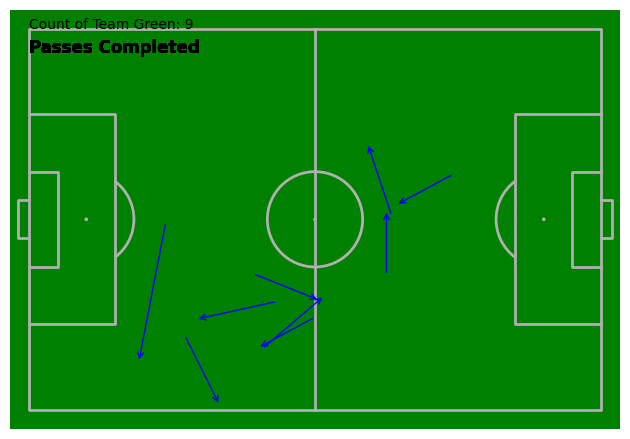

In [209]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning colors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}
c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in filtered_df.iterrows():
    if row['PassCompletion'] == "pass completed":
        if row['Team'] == 'Green':
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            # Plotting arrows and scatter points
            y_start= y_start-over
            y_end= y_end-over
            ax.annotate("", xy=(x_start, y_start), xytext=(x_end, y_end),
                    arrowprops=dict(arrowstyle='->', color='blue'), alpha=0.5,
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=1))
            # ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
            #          color=pass_completion_colors[pass_completion], alpha=0.3,
            #          head_width=2, head_length=2, zorder=2)  # Adjust head width and length as needed
            # ax.scatter(x_start, y_start, color=pass_completion_colors[pass_completion], zorder=3, alpha=0.6)
            # ax.scatter(x_end, y_end, color=pass_completion_colors[pass_completion], zorder=3, alpha=0.6)
            # Add text annotation for "Passes Completed" heading and count of passes completed
            ax.text(0, 5, "Passes Completed", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(0, 0, f"Count of Team Green: {c}", fontsize=10, color='black')

plt.show()  # Show the plot


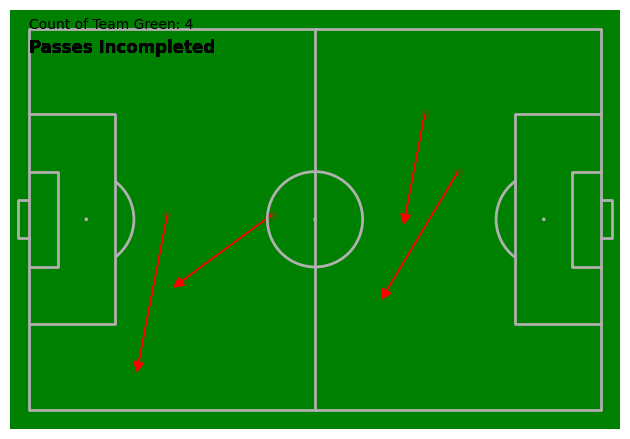

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning c
# olors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}
c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in df_fin.iterrows():
    if row['Team'] == 'Green':
        if row['PassCompletion'] == "pass incomplete":
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            y_start= y_start-over
            y_end= y_end-over
            # Plotting arrows and scatter points
            ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                    color=pass_completion_colors[pass_completion], alpha=1,
                    head_width=2, head_length=2, zorder=0)  # Adjust head width and length as needed
            ax.scatter(x_start, y_start, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            ax.scatter(x_end, y_end, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            # Add text annotation for "Passes Completed" heading and count of passes completed
            ax.text(0, 5, "Passes Incompleted", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(0, 0, f"Count of Team Green: {c}", fontsize=10, color='black')

plt.show()  # Show the plot


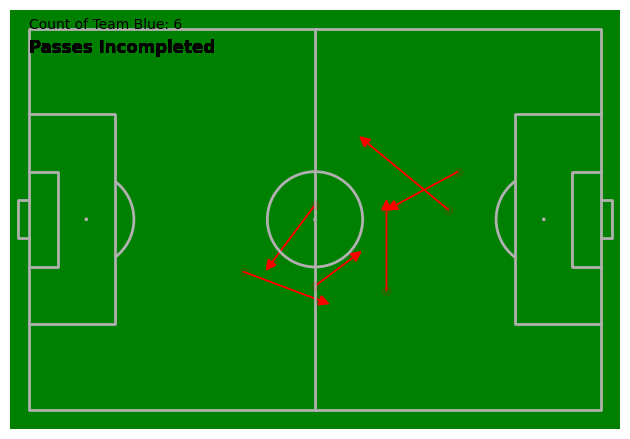

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch

# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning c
# olors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "yellow",
    "pass incomplete": "red"
}
c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in df_fin.iterrows():
    if row['Team'] == 'Blue':
        if row['PassCompletion'] == "pass incomplete":
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            y_start= y_start-over
            y_end= y_end-over
            # Plotting arrows and scatter points
            ax.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                    color=pass_completion_colors[pass_completion], alpha=1,
                    head_width=2, head_length=2, zorder=0)  # Adjust head width and length as needed
            ax.scatter(x_start, y_start, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            ax.scatter(x_end, y_end, color=pass_completion_colors[pass_completion], zorder=1, alpha=0.1)
            # Add text annotation for "Passes Completed" heading and count of passes completed
            ax.text(0, 5, "Passes Incompleted", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(0, 0, f"Count of Team Blue: {c}", fontsize=10, color='black')

plt.show()  # Show the plot


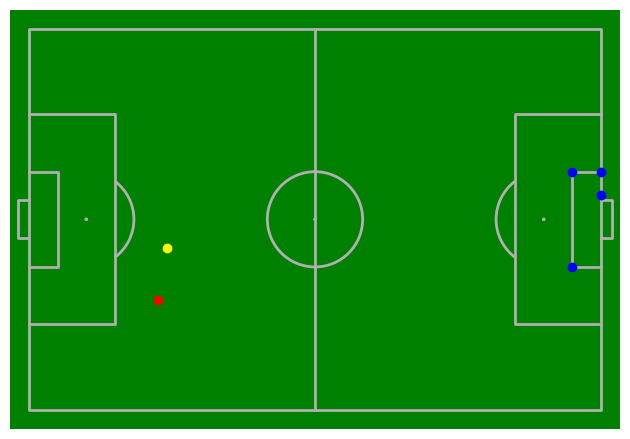

In [6]:
# Assuming you have already created a plot named 'ax'
from mplsoccer import Pitch
pitch = Pitch(pitch_color='green', goal_type='box', goal_alpha=1, pitch_length=120, pitch_width=80)
fig, ax = pitch.draw()
(0, 18), (18, 18), (18, 62), (0, 62)
# ax.scatter(42, 76, zorder=1, alpha=1, color='blue')
# ax.scatter(14, 56, zorder=1, alpha=1, color='blue')
ax.scatter(29, 46, zorder=1, alpha=1, color='yellow')
ax.scatter(27, 57, zorder=1, alpha=1, color='red')
# ax.scatter(6, 30, zorder=1, alpha=1, color='red')
# ax.scatter(0, 30, zorder=1, alpha=1, color='red')

# ax.scatter(15, 56, zorder=1, alpha=1, color='yellow')
# ax.scatter(0, 45, zorder=1, alpha=1, color='blue')
# ax.scatter(0, 35, zorder=1, alpha=1, color='blue')
ax.scatter(114, 50, zorder=1, alpha=1, color='blue')
ax.scatter(114, 30, zorder=1, alpha=1, color='blue')
# ax.scatter(120, 40, zorder=1, alpha=1, color='blue')
ax.scatter(120, 30, zorder=1, alpha=1, color='blue')
ax.scatter(120, 35, zorder=1, alpha=1, color='blue')
# ax.scatter(102, 18, zorder=1, alpha=1, color='RED')
# ax.scatter(102, 40, zorder=1, alpha=1, color='RED')
# ax.scatter(102, 62, zorder=1, alpha=1, color='RED')
# ax.scatter(120, 18, zorder=1, alpha=1, color='RED')
# ax.scatter(120, 40, zorder=1, alpha=1, color='RED')
# ax.scatter(120, 62, zorder=1, alpha=1, color='RED')

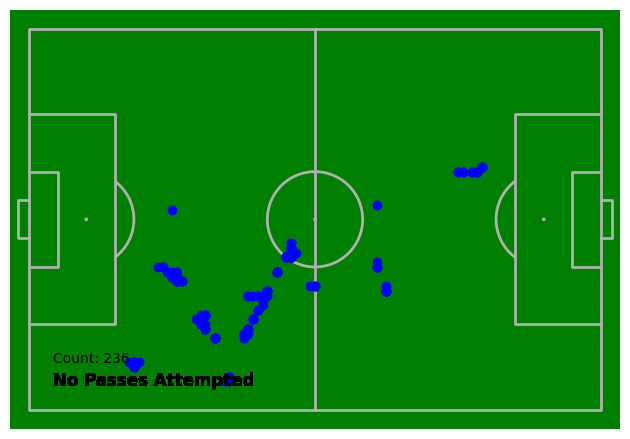

In [130]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer import Pitch
# Assuming you have already created a plot named 'ax'
pitch = Pitch(pitch_color= 'green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()

# Assigning colors based on PassCompletion
pass_completion_colors = {
    "no pass attempted": "blue",
    "pass completed": "green",
    "pass incomplete": "red"
}
c=0
# Iterate through the DataFrame to plot arrows between consecutive points
for index, row in df_fin.iterrows():
    if row['Team'] == 'Blue':
        if row['PassCompletion'] == "no pass attempted":
            x_start, y_start = row['Starting_Point']     # Starting point
            x_end, y_end = row['Ending_Point']     # Ending point
            pass_completion = row['PassCompletion']  # Pass completion status
            y_start= y_start-over
            y_end= y_end-over
            # Plotting arrows and scatter points
            # ax.arrow(y_start, x_start, y_end - y_start, x_end - x_start, color=pass_completion_colors[pass_completion], alpha=1)
            ax.scatter(x_start, y_start, color=pass_completion_colors[pass_completion], zorder=3)
            # ax.scatter(y_end, x_end, color=pass_completion_colors[pass_completion], zorder=3)
            ax.text(5, 75, "No Passes Attempted", fontsize=12, color='black', weight='bold')
            c=c+1

ax.text(5, 70, f"Count: {c}", fontsize=10, color='black')

plt.show()  # Show the plot
